In [102]:
import torch
import torchvision

bsize = 1
crop = 256 # 48  256
px = 224 # 32  224
data_path = '/Users/jcc/Desktop/v1/vonenet/val'
normalize = torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                             std=[0.5, 0.5, 0.5]) #归一化处理方便gpu计算
dataset = torchvision.datasets.ImageFolder(data_path,
    torchvision.transforms.Compose([
        torchvision.transforms.Resize(crop),  
        torchvision.transforms.CenterCrop(px),  
        torchvision.transforms.ToTensor(),
        normalize,
    ]))
data_loader = torch.utils.data.DataLoader(dataset, batch_size=bsize, shuffle=False, num_workers=4, pin_memory=True)
dataloader_iterator = iter(data_loader)
x, _ = next(dataloader_iterator)

In [122]:
# 计算无噪声均值
import vonenet
from vonenet.activation import ActivationExtractor

bsize = 1
model_no_noise = vonenet.get_model(model_arch='cornets', pretrained=True, noise_mode="neuronal").module
model_no_noise.vone_block.noise_mode=None
# batch_size = 4
# x = torch.randn(batch_size, 3, 224, 224)
# Extract activations from multiple layers
layer_names = [
    'vone_block',  # V1 layer
    'model.V2.conv1',
    'model.V2.conv3',
    'model.V2',    # V2 layer
    # 'model.V4',    # V4 layer
    # 'model.IT'     # IT layer
]
extractor_nonoise = ActivationExtractor(model_no_noise, layer_names)
activations_nonoise = extractor_nonoise.extract(x)

Neuronal distributions gabor parameters
Model:  VOneCORnet-S


In [123]:
import vonenet
import numpy as np
from vonenet.activation import ActivationExtractor

bsize = 16
data_loader = torch.utils.data.DataLoader(dataset, batch_size=bsize, shuffle=False, num_workers=4, pin_memory=True)
dataloader_iterator = iter(data_loader)
x, _ = next(dataloader_iterator)

modelv1 = vonenet.get_model(model_arch='cornets', pretrained=True, noise_mode="neuronal").module
modelv1.vone_block.noise_mode='gaussian'
# modelv1.vone_block.noise_level = 0
# batch_size = 4
# x = torch.randn(batch_size, 3, 224, 224)
# Extract activations from multiple layers
# layer_names = [
#     'vone_block',  # V1 layer
#     'model.V2.conv1',
#     # 'model.V2.conv3',
#     # 'model.V2',    # V2 layer
#     # 'model.V4',    # V4 layer
#     # 'model.IT'     # IT layer
# ]
extractor = ActivationExtractor(modelv1, layer_names)
activations = extractor.extract(x)

Neuronal distributions gabor parameters
Model:  VOneCORnet-S


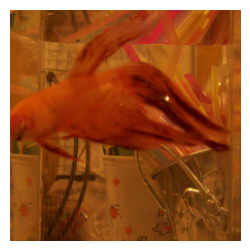

In [5]:
import matplotlib.pyplot as plt
im_ind=15

input_im = np.moveaxis(X[im_ind].numpy(),0,-1)
input_im = input_im/2 +0.5
    
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(3,3)
im_h=ax.imshow(input_im)
im_h.set_clim([0, 1])
ax.set_axis_off()
plt.show()

In [6]:
# 找出在该图像上响应最一致（标准差最小）和最不一致（标准差最大）的特征
np.argsort(np.std(activations[im_ind].detach().numpy().reshape((500, -1)), axis=1))

array([421, 192, 211, 101, 411, 344, 233, 174, 259, 433,  98, 329, 128,
       189,  15, 432, 139, 130, 353,  67,  92,  33, 463, 185, 162, 458,
       255, 217, 103,  42,  64, 448, 325, 187,   8,  47,  99, 275, 420,
       264, 137,  68, 413, 120, 170, 295, 110, 326,   0, 473, 468, 351,
       154,  74, 398,  81, 391,  32,  26, 117, 446, 373, 109, 441, 352,
       493, 261, 237, 121,  60, 178, 280, 490, 397, 470, 469,  14, 482,
       133, 231,  75,  79, 484,  49,  93, 467, 118, 394, 495, 165, 494,
       389,  41, 204, 151, 315, 115, 289, 227, 355, 418,  70,  50,   9,
       425, 207, 415,  72, 357,  61, 479, 202,  27,  13, 392, 184, 496,
       215, 435, 453, 124, 383, 167, 335, 292,  53, 475,  31,   5,  76,
       238, 104, 445, 116, 401, 498, 203, 193,  66, 177,   4, 142, 336,
       182, 492, 283,  78, 240, 328,  91, 114, 125, 423, 108, 254, 239,
       252, 212, 258,  37, 220, 382,  86,  89, 319, 216, 269, 308, 176,
       354, 428, 390, 148,  28,  54,  43,  16, 380, 499, 242, 27

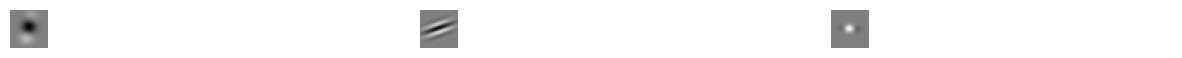

In [7]:
# 如果这个数组与之前讨论的模型激活值有关，那么v1_ind可能表示两个特定的特征索引。
v1_ind=np.array([391, 246, 173])

fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(15,15)
for v1_i, v1_ind_ in enumerate(v1_ind):
    
    v1_k = v1_model.vone_block.simple_conv_q0.weight[v1_ind_,:,:,:].detach().numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[v1_i].imshow(v1_k, cmap='gray')
    ax[v1_i].set_xlim([0, px])
    im_h.set_clim([0, 1])
    ax[v1_i].set_axis_off()
plt.show()

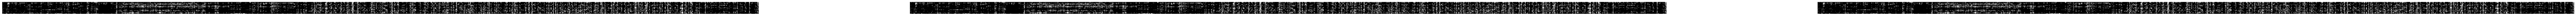

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(150,150)
max_activations = np.amax(activations.detach().numpy())/np.sqrt(2)

# 需要这个activations截取的一个层（2D的）
for v1_i, v1_ind_ in enumerate(v1_ind):
    v1_im = activations.detach().numpy()
    v1_im = v1_im / max_activations
    im_h=ax[v1_i].imshow(v1_im, cmap='gray')
    im_h.set_clim([0, 1])
    ax[v1_i].set_axis_off()

plt.show()

In [67]:
# 显示某一block里每一层的权重

num_channels= 512
max_columns = 16

fig, ax = plt.subplots(nrows=num_channels//max_columns, ncols=max_columns)

fig.set_size_inches(15,15)
for i in range(num_channels):
    v1_k = model.model.V2.conv3.weight[i,:,:,:].detach().numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[i//max_columns, np.mod(i,max_columns)].imshow(v1_k, cmap='gray')
#     ax[i//num_channels, np.mod(i,num_channels)].set_xlim([0, 223])
    im_h.set_clim([0, 1])
    ax[i//max_columns, np.mod(i,max_columns)].set_axis_off()
plt.show()

In [127]:
#显示某一区块特定的层的激活值
def plotlayerxtrial(block, layer_n, vmin=-2,vmax=2):
    """
    Plots the response of the trials from V1_np block at the specified layer.

    Parameters:
    block : numpy array
        A 4D array representing [trial, layer, x, y] activations of a neural network.
    layer_n : int
        The specific layer for which the response is plotted.
    """
    mean_i = np.mean(block, axis=0)  # calculate the mean over trials (optional if needed)
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6), constrained_layout=True)  # 2x5 grid
    m_ref = block  # reference to the block
    

    for idx in range(10):  # plotting for 10 trials
        ax = axes[idx // 5, idx % 5]  # select subplot position
        img = ax.imshow(m_ref[idx, layer_n, :, :], cmap='seismic', interpolation='none', vmin=vmin, vmax=vmax)
        ax.set_title(f'Trial = {idx+1}')
        ax.axis('off')  # hide the axis
    
    fig.colorbar(img, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)  # add colorbar
    plt.suptitle(f'Responses for Layer {layer_n}')
    plt.show()

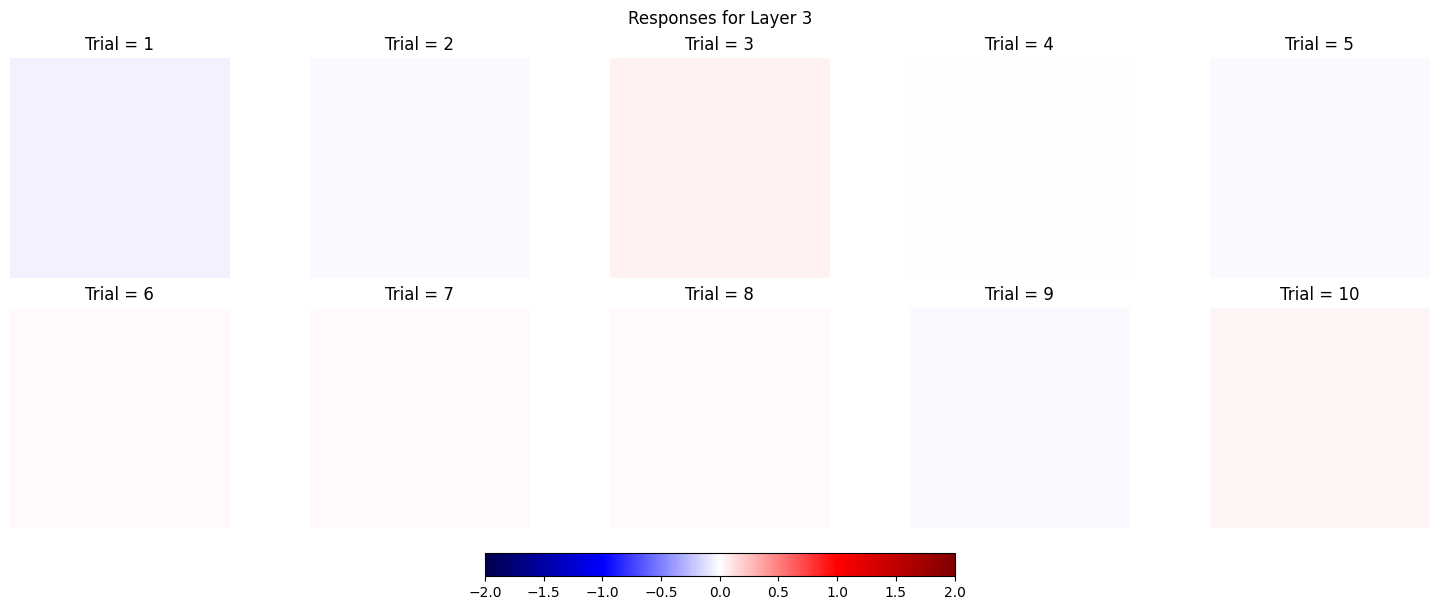

In [39]:
# [filter ID, block_layer, x, y]
plotlayerxtrial(v1_model.model.V2.conv1.weight[:,:,:,:].detach().numpy(), 3)

In [ ]:
# 显示某一块区*trial中，特定层中不在阈值范围内的
import numpy as np
import matplotlib.pyplot as plt
def plotlayer_threshold_trials(block, layer_n-=1, thr_int=(-0, 0),isFluctuation=False):
    """
    Plots the fluctuations of each trial from V1_np block at the specified layer, 
    with the option to zero out values within a given threshold interval.

    Parameters:
    block : numpy array
        A 4D array representing [trial, layer, x, y] activations of a neural network.
    layer_n : int
        The specific layer for which the response is plotted.
    thr_int : tuple, optional
        Threshold interval. Values between thr_int[0] and thr_int[1] are set to 0 (default is (-0.7, 0.7)).
    """

    mean_i = np.mean(block, axis=0)  # calculate the mean across trials
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6), constrained_layout=True)  # 2x5 grid
    
    for idx in range(10):  # plotting for 10 trials
        ax = axes[idx // 5, idx % 5]  # select subplot position

        # Calculate the fluctuation (trial response - mean response for the layer)
        if isFluctuation:
            m_ref = block[idx, layer_n, :, :] - mean_i[layer_n, :, :]
            m_ref[(mean_i[layer_n] >= thr_int[0]) & (mean_i[layer_n] <= thr_int[1])] = 0
        else:
            m_ref = block[idx, layer_n, :, :]
            m_ref[(mean_i[layer_n] >= thr_int[0]) & (mean_i[layer_n] <= thr_int[1])] = 0

        # Zero out values in the specified threshold interval
        
        # Plot the result using the 'bwr' colormap
        img = ax.imshow(m_ref, cmap='bwr', interpolation='none', vmin=-5, vmax=5)
        ax.set_title(f'Trial = {idx+1}')
        ax.axis('off')  # hide the axis
    
    # Add a colorbar to the figure
    fig.colorbar(img, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)
    plt.suptitle(f'Fluctuations of each trial at layer {layer_n}')
    plt.show()
# Example usage:

# Assuming V1_np is a 4D array with shape (trials, layers, x, y)
# V1_np = np.random.randn(20, 502, 64, 64)  # dummy
# plotlayer_threshold_trials(V1_np, 10, isFluctuation=True)

In [160]:
# 比较两个np blocks (channels, x, y)中不同激活值的点位
def where_dif(block1, block2):
    if block1.shape != block2.shape:
        raise ValueError("The shapes of block1 and block2 should be the same.")
    dif_indices = np.where(block1 != block2)    
    return dif_indices
# model.V2.conv1/3
choose_layer = 'model.V2'
dif_loc = where_dif(activations[choose_layer][0,:,:,:]-activations_nonoise[choose_layer][0,:,:,:], activations[choose_layer][1,:,:,:]-activations_nonoise[choose_layer][1,:,:,:])
print(dif_loc)

(array([  0,   0,   0, ..., 127, 127, 127]), array([ 0,  0,  0, ..., 27, 27, 27]), array([ 1,  2,  3, ..., 20, 25, 26]))


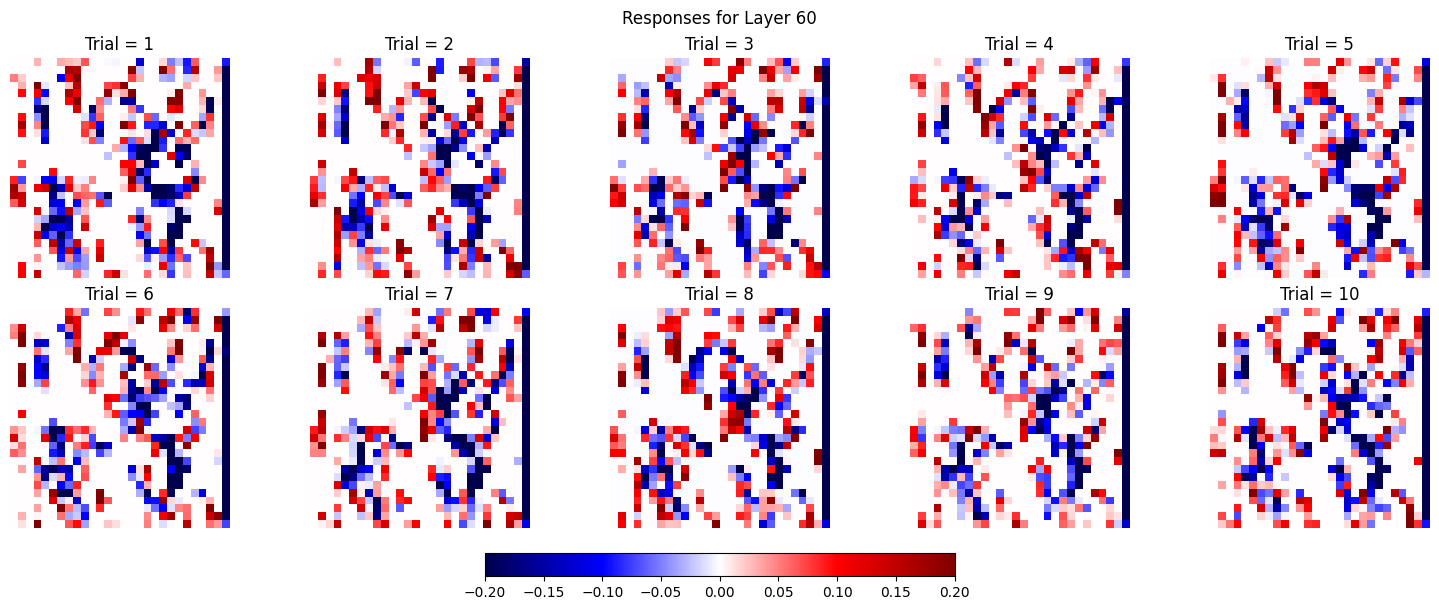

In [164]:
plotlayerxtrial(activations[choose_layer].detach().numpy() - activations_nonoise[choose_layer].detach().numpy(),60,vmin=-0.2,vmax=0.2)
#  activations[choose_layer].detach().numpy() - activations_nonoise[choose_layer].detach().numpy()

In [35]:
# 在np某块区域改变activation
def change_activation(tensor, start, end, increment):
    # 定义增加值的区域，这里我们假设要增加的区域是每个维度的后半部分
    # 请注意，这种方法假设张量的每个维度至少为2，否则无法定义一个区域
    index = [slice(start[i], end[i]) if end[i] > start[i] else slice(start[i], tensor.shape[i])
             for i in range(tensor.dim())]
    # 增加区域内的值
    tensor[index] += increment


In [60]:
change_activation(x[1,:,:,:], (1,10,10), (1,10,10), 5)


In [159]:
# Save result to csv file
import os
import numpy as np
import pandas as pd

def save_to_csv(resample, layer_name):
    # Define the file path
    file_path = f"{layer_name}.csv"

    # Convert resample to a DataFrame if it's not already
    if not isinstance(resample, pd.DataFrame):
        resample_df = pd.DataFrame(resample)
    else:
        resample_df = resample

    # Check if the file exists
    if os.path.exists(file_path):
        # Load existing data
        existing_df = pd.read_csv(file_path, index_col=0)
        # Concatenate along columns
        updated_df = pd.concat([existing_df, resample_df], axis=1)
    else:
        # If file doesn't exist, the updated DataFrame is just the new data
        updated_df = resample_df

    # Save the updated DataFrame back to the CSV file
    updated_df.to_csv(file_path)

In [ ]:
单个点增加到1
什么情况会有prediction（用不同图？sample很多units）
普通regression